In [1]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import numpy as np

data_dir = '/content/drive/MyDrive/Image Classification Data'
ct_labels = np.load(os.path.join(data_dir, 'ct_labels.npy'))
ct_data = np.load(os.path.join(data_dir, 'ct_data.npy'))

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ct_data, ct_labels, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5155, 224, 224)
Validation set shape: (1289, 224, 224)
Testing set shape: (1611, 224, 224)


In [6]:
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (5155,)
Validation set shape: (1289,)
Testing set shape: (1611,)


In [7]:


from sklearn.preprocessing import LabelBinarizer

# Convert class labels to binary format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)


In [8]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build a baseline fully connected model
baseline_model = Sequential()
baseline_model._name = "Baseline"


# Add a Conv2D layer with 32 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
baseline_model.add(Flatten())


baseline_model.add(Dense(16, activation='relu')) 

baseline_model.add(Dense(1, activation='sigmoid')) 

# Define early stopping callback
trainCallback = EarlyStopping(monitor='accuracy', min_delta=1e-2, patience=5)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


baseline = baseline_model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=64,
                   validation_data=(X_val, y_val),
                   callbacks=[trainCallback])


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 495s 6s/step - loss: 0.0000e+00 - accuracy: 0.6772 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 2/50
81/81 [==============================] - 491s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 3/50
81/81 [==============================] - 492s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 4/50
81/81 [==============================] - 491s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 5/50
81/81 [==============================] - 495s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 6/50
81/81 [==============================] - 481s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796


In [10]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 40s 778ms/step - loss: 0.0000e+00 - accuracy: 0.6574
Test loss: 0.0
Test accuracy: 0.6573556661605835


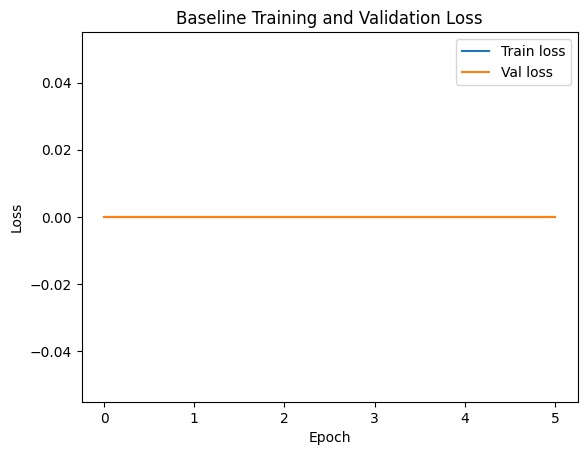

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss history
history = baseline.history
train_loss = history['loss']
val_loss = history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Baseline Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



51/51 [==============================] - 37s 717ms/step


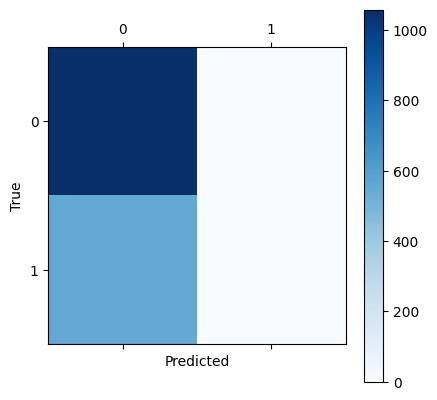

In [12]:
from sklearn.metrics import confusion_matrix
# Assume you have trained and fitted a machine learning model called `model`
# and you have a test set `X_test` and `y_test`

# Use the trained model to predict the target variable based on X_test
y_pred = baseline_model.predict(X_test)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


51/51 [==============================] - 40s 764ms/step


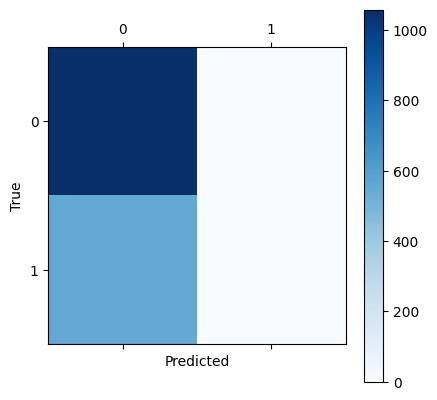

In [13]:
from sklearn.metrics import confusion_matrix

# Use the trained model to predict the target variable based on X_test
y_pred = baseline_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))


# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
162/162 [==============================] - 632s 4s/step - loss: 0.3988 - accuracy: 0.8066 - val_loss: 0.2536 - val_accuracy: 0.8720
Epoch 2/10
162/162 [==============================] - 622s 4s/step - loss: 0.2273 - accuracy: 0.8923 - val_loss: 0.2195 - val_accuracy: 0.8999
Epoch 3/10
162/162 [==============================] - 624s 4s/step - loss: 0.1719 - accuracy: 0.9286 - val_loss: 0.2209 - val_accuracy: 0.8960
Epoch 4/10
162/162 [==============================] - 620s 4s/step - loss: 0.1229 - accuracy: 0.9498 - val_loss: 0.2274 - val_accuracy: 0.9123
Epoch 5/10
162/162 [==============================] - 624s 4s/step - loss: 0.0790 - accuracy: 0.9678 - val_loss: 0.2592 - val_accuracy: 0.9185
Epoch 6/10
162/162 [==============================] - 618s 4s/step - loss: 0.0591 - accuracy: 0.9787 - val_loss: 0.2239 - val_accuracy: 0.9247
Epoch 7/10
162/162 [==============================] - 620s 4s/step - loss: 0.0358 - accuracy: 0.9872 - val_loss: 0.3014 - val_accuracy: 0.9193

In [15]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 48s 937ms/step - loss: 0.3535 - accuracy: 0.9174
Test loss: 0.3534733057022095
Test accuracy: 0.9174425601959229


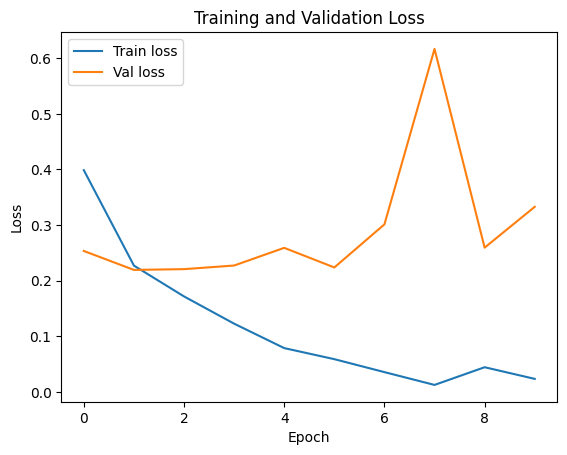

In [16]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


51/51 [==============================] - 36s 713ms/step


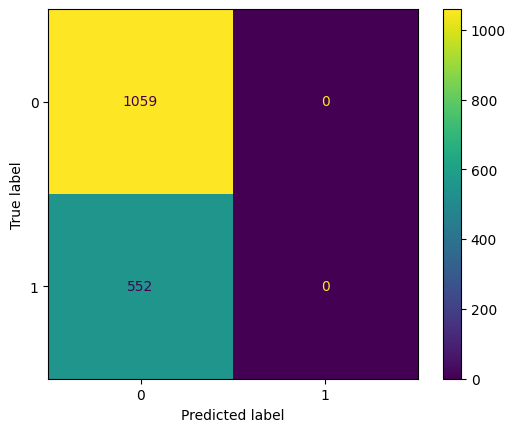

Classification report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1059
           1       0.00      0.00      0.00       552

    accuracy                           0.66      1611
   macro avg       0.33      0.50      0.40      1611
weighted avg       0.43      0.66      0.52      1611



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Use the trained model to predict the target variable based on X_test
y_pred = baseline_model.predict(X_test)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [20]:
# overfitting -- so adding L2 regularization

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/10
162/162 [==============================] - 628s 4s/step - loss: 1.0818 - accuracy: 0.7670 - precision: 0.6600 - recall: 0.5731 - val_loss: 0.6817 - val_accuracy: 0.7905 - val_precision: 0.6082 - val_recall: 0.9734
Epoch 2/10
162/162 [==============================] - 616s 4s/step - loss: 0.5676 - accuracy: 0.8355 - precision: 0.7526 - recall: 0.7300 - val_loss: 0.5613 - val_accuracy: 0.7905 - val_precision: 0.9133 - val_recall: 0.3826
Epoch 3/10
162/162 [==============================] - 619s 4s/step - loss: 0.4861 - accuracy: 0.8499 - precision: 0.7702 - recall: 0.7619 - val_loss: 0.4548 - val_accuracy: 0.8542 - val_precision: 0.8866 - val_recall: 0.6247
Epoch 4/10
162/162 [==============================] - 605s 4s/step - loss: 0.4292 - accuracy: 0.8652 - precision: 0.7912 - recall: 0.7907 - val_loss: 0.4219 - val_accuracy: 0.8751 - val_precision: 0.7414 - val_recall: 0.9370
Epoch 5/10
 87/162 [===============>..............] - ETA: 4:26 - loss: 0.4037 - accuracy: 0.8628 - 

In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers
from keras import optimizers


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers
from keras import optimizers

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.001
opt = optimizers.Adam(lr=0.01)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#next model to update filters from 32 to 64

In [ ]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers
from keras import optimizers

#update the previous model to have a learning rate of .001
opt = optimizers.Adam(lr=0.001)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers
from keras import optimizers

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.001
opt = optimizers.Adam(lr=0.001)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()